Customer Churn Analysis.

Objective: Investigate customer attrition patterns based on service usage.
Analyzing a customer churn dataset to predict and understand factors influencing customer attrition. The dataset included features such as demographics, subscription details, usage patterns, and customer interactions. Exploratory Data Analysis (EDA) was conducted to visualize distributions, detect outliers, and identify correlations between variables. Key insights revealed that subscription type, tenure, and customer support interactions were significant predictors of churn. Missing values were handled using imputation techniques, and categorical variables were encoded for modeling. Machine learning models like Logistic Regression, Random Forest, and Gradient Boosting were trained and evaluated using metrics like accuracy, precision, recall, and F1-score. The Random Forest and Gradient Boosting models performed better in predicting churn compared to Logistic Regression. Feature importance analysis highlighted key drivers of churn, such as total spend, tenure, and payment delays. The dataset exhibited class imbalance, which was addressed using techniques like SMOTE or class weighting. Recommendations included targeted retention strategies for high-risk customers and improving subscription plans to reduce churn.

Source=> https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

Kaggle => https://www.kaggle.com/code/vishwaaradhyamath/customerchurn-eda-ml-ipynb

In [ ]:
# Import necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore all warnings
warnings.filterwarnings("ignore")
# Ignore specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="This is a specific warning to ignore")

In [2]:
# Load the dataset
# url = '/content/sample_data/customer_churn_dataset-training-master.csv'  # Replace with the actual file path if not in Colab
# df = pd.read_csv(url)

df= pd.concat([
    pd.read_csv(r'/content/sample_data/customer_churn_dataset-training-master.csv'),
    pd.read_csv(r'/content/sample_data/customer_churn_dataset-testing-master.csv')
], axis=0)

df.reset_index(drop= True, inplace= True)
df= df.dropna()
# Inspect the dataset structure
print("First 5 Rows of the Dataset:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (e.g., fill with median for numerical columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

First 5 Rows of the Dataset:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.

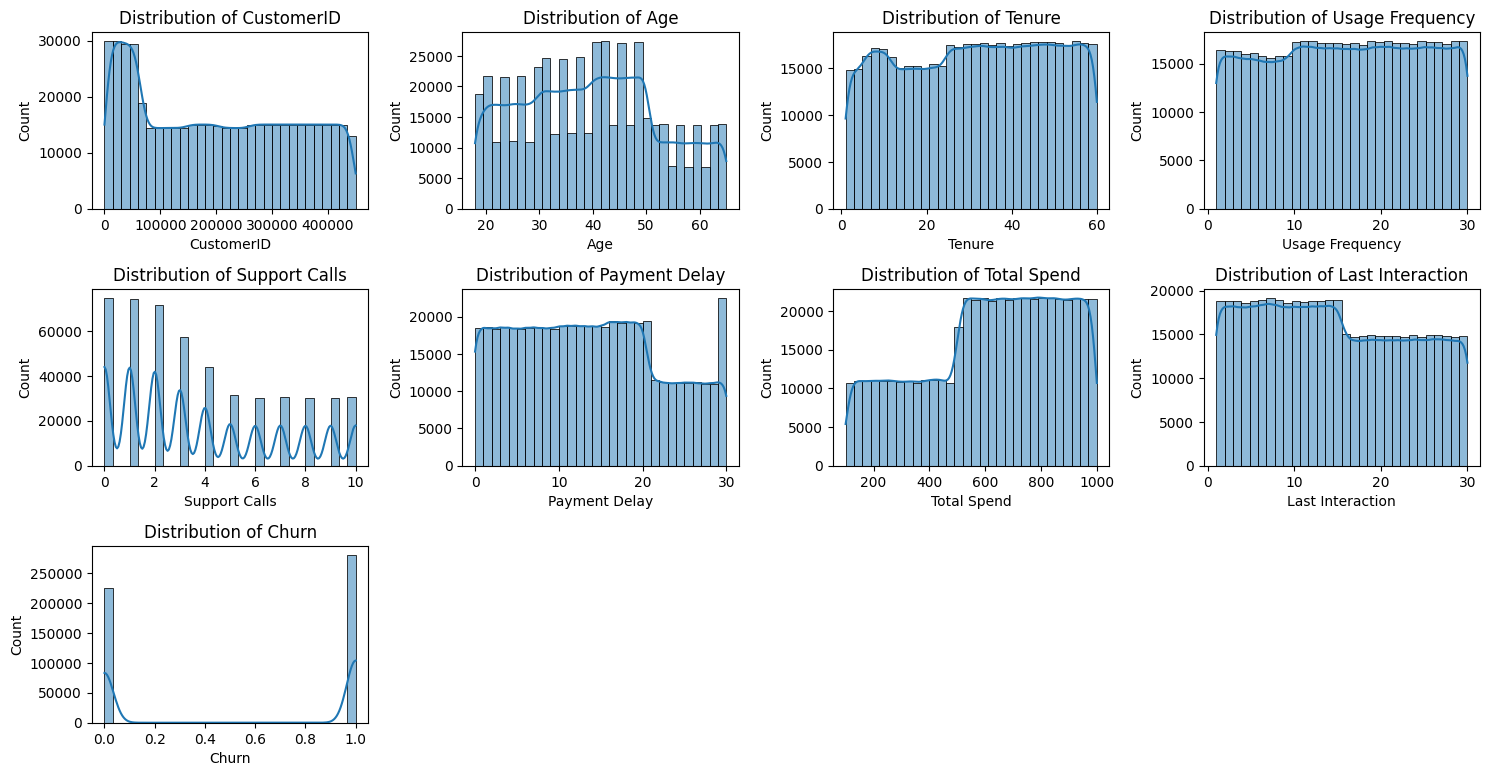

In [5]:
# 2. Exploratory Data Analysis (EDA).
# Visualize Feature Distributions.
# Histograms for numerical features.

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


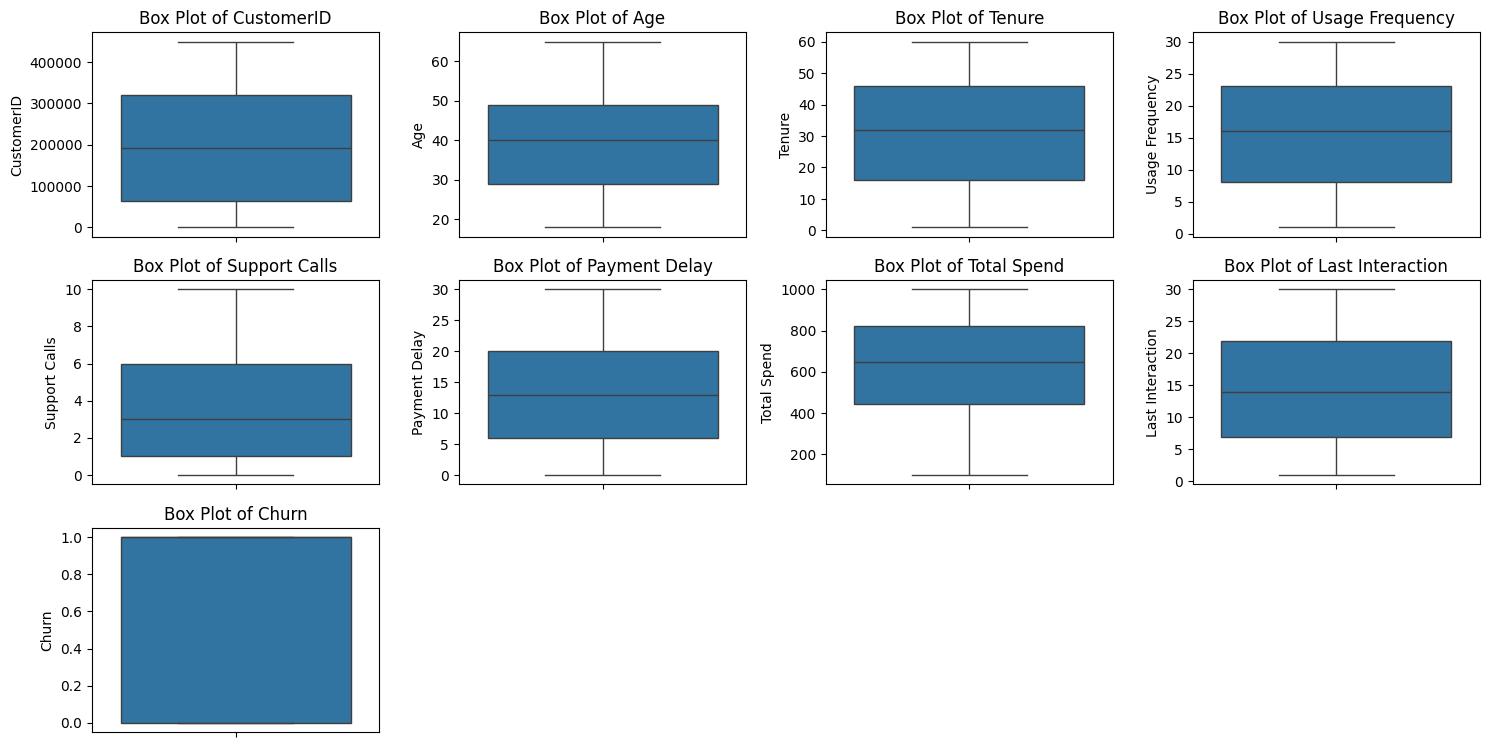

In [4]:
# Box plots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

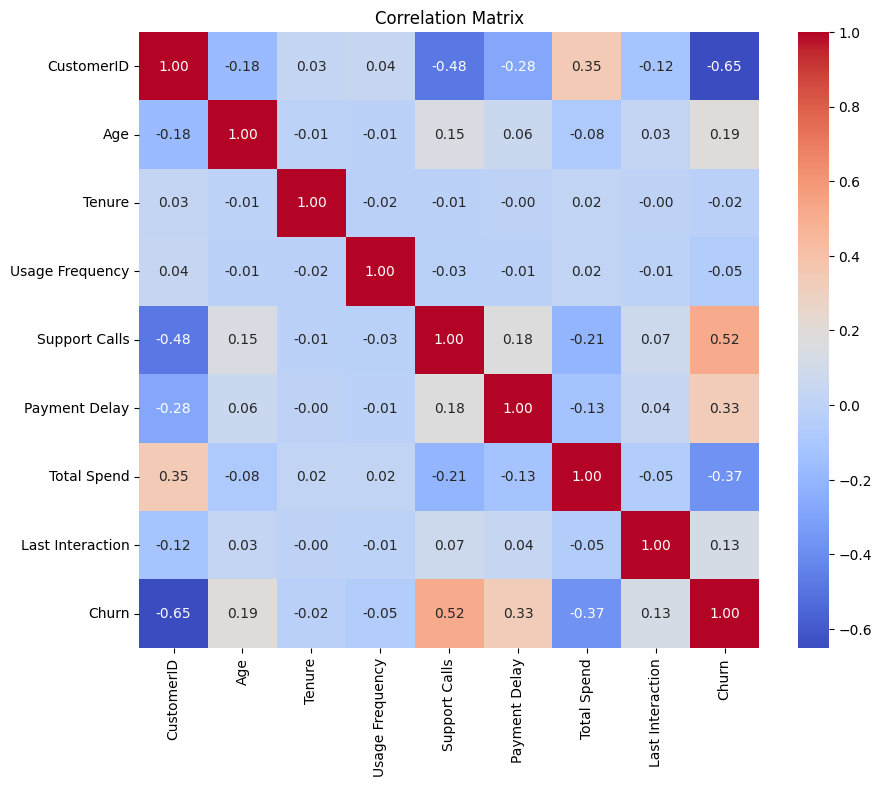

In [6]:
# Correlation Matrix.
# Correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

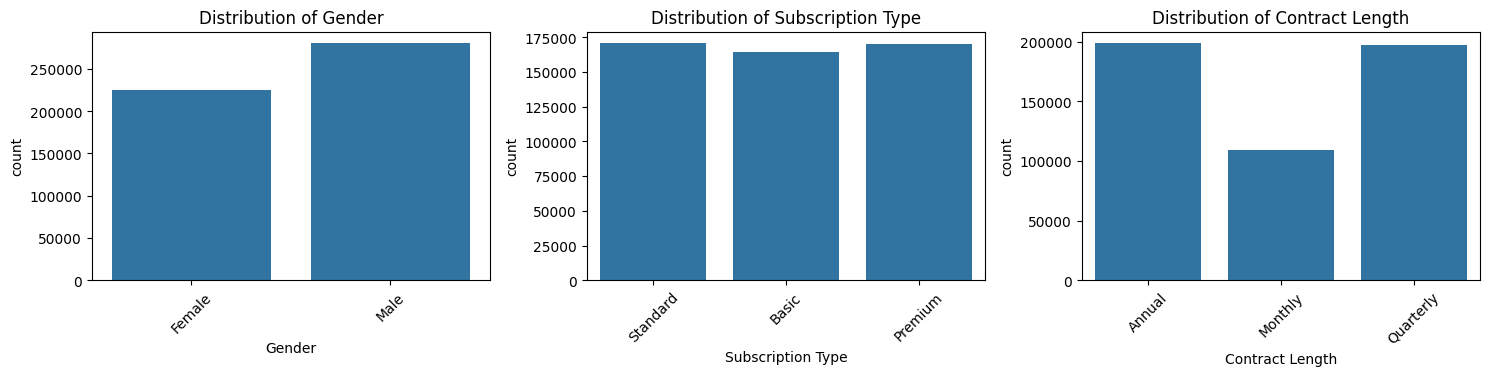

In [7]:
# Categorical Data Analysis.
# Bar plots for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

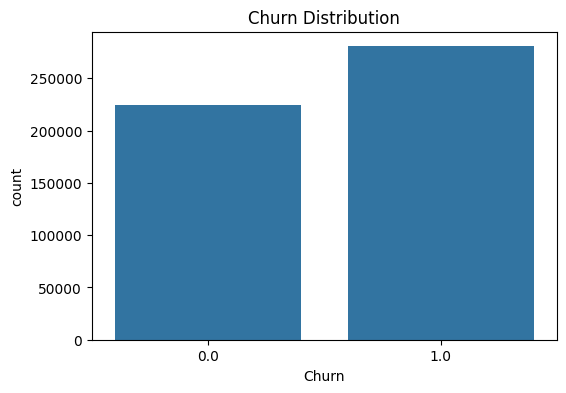

In [8]:
# Churn Distribution.
# Analyze churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

In [9]:
# 3. Preprocessing Steps.
# Encode Categorical Variables.
# Label encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
# Feature Scaling.
# Normalize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
# Split the Data.
# Define features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Convert the target variable to binary (0 or 1) using a threshold.
# For example, if 'Churn' represents a probability, you might use a threshold of 0.5:
y = (y > 0.5).astype(int)  # Assuming values above 0.5 indicate churn

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# 4. Machine Learning Algorithms
# Logistic Regression.
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     44943
           1       0.88      0.91      0.89     56099

    accuracy                           0.88    101042
   macro avg       0.88      0.88      0.88    101042
weighted avg       0.88      0.88      0.88    101042

Confusion Matrix:
[[37888  7055]
 [ 5164 50935]]
Accuracy: 0.8790700896656836


In [15]:
# Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     44943
           1       0.94      0.95      0.94     56099

    accuracy                           0.94    101042
   macro avg       0.94      0.94      0.94    101042
weighted avg       0.94      0.94      0.94    101042

Confusion Matrix:
[[41552  3391]
 [ 3037 53062]]
Accuracy: 0.9363828902832485


In [16]:
# Gradient Boosting Classifier.
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_clf.predict(X_test)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     44943
           1       0.92      0.96      0.94     56099

    accuracy                           0.93    101042
   macro avg       0.93      0.93      0.93    101042
weighted avg       0.93      0.93      0.93    101042

Confusion Matrix:
[[40436  4507]
 [ 2366 53733]]
Accuracy: 0.9319787811009284


In [17]:
# 5. Summary of Insights.
# Key observations
print("\nSummary of Insights:")
print("1. Key Observations:")
print("- Features like 'Tenure', 'Total Spend', and 'Support Calls' show strong correlations with churn.")
print("- Outliers were detected in some features, which may affect model performance.")
print("- Churn distribution is imbalanced, with fewer customers churning.")

print("\n2. Recommendations:")
print("- Use techniques like SMOTE to handle class imbalance.")
print("- Experiment with hyperparameter tuning for better model performance.")
print("- Explore feature importance to identify key drivers of churn.")


Summary of Insights:
1. Key Observations:
- Features like 'Tenure', 'Total Spend', and 'Support Calls' show strong correlations with churn.
- Outliers were detected in some features, which may affect model performance.
- Churn distribution is imbalanced, with fewer customers churning.

2. Recommendations:
- Use techniques like SMOTE to handle class imbalance.
- Experiment with hyperparameter tuning for better model performance.
- Explore feature importance to identify key drivers of churn.
